# O que vende um carro?

Você é analista na Lista de Eixo de Manivela. Centenas de propagandas gratuitas de veículos são publicadas no seu site todos os dias. Você precisa estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

[Nós fornecemos-te alguns comentários para guiar sua linha de raciocínio enquanto você completa esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de você mergulhar na análise dos seus dados, explique a si mesmo o propósito do seu projeto e ações que planeja fazer.]

[Por favor, tenha em mente que estudar, modificar, e analisar dados é um processo iterativo. É normal retornar aos passos anteriores e corrigir/expandir algo para permitir os próximos passos.]

## Iniciação

Serão carregado as bibliotecas:

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt



### Carregue dados

[Carregue os dados do projeto e dê uma olhada às informações gerais.]

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada

[Entendendo os campos, explore-os para se familiarizar com os dados.]

In [3]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


(51525, 13)

In [4]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Nosso DataFrame possui 13 colunas e 51525 linhas, dentre as 13 colunas, possuímos 5 colunas com valores ausentes. Nosso conjunto de dados possui colunas com dados inapropriados como: `date_poste` é uma coluna com data e está como string, as colunas `cylinders` e `is_4wd` são valores flutuantes sendo que originalmente podem ser números inteiros.

In [5]:
df['model_year'].unique()


array([2011.,   nan, 2013., 2003., 2017., 2014., 2015., 2012., 2008.,
       2018., 2009., 2010., 2007., 2004., 2005., 2001., 2006., 1966.,
       1994., 2019., 2000., 2016., 1993., 1999., 1997., 2002., 1981.,
       1995., 1996., 1975., 1998., 1985., 1977., 1987., 1974., 1990.,
       1992., 1991., 1972., 1967., 1988., 1969., 1989., 1978., 1965.,
       1979., 1968., 1986., 1980., 1964., 1963., 1984., 1982., 1973.,
       1970., 1955., 1971., 1976., 1983., 1954., 1962., 1948., 1960.,
       1908., 1961., 1936., 1949., 1958., 1929.])

In [6]:
df['is_4wd'].unique()

array([ 1., nan])

Após uma breve avaliação, foi constatado que as colunas `model_year`, `cylinders`, `odometer` e  `is_4wd` estão como float quando na verdade poder ser inteiros, pois não apresentam números após a vírgula.

In [7]:
valores_ausentes = df.isna().sum()
valores_ausentes

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

Existem valores ausentes em 5 colunas: `model_year`, `cylinders`, `odometer`, `paint_color` e `is_4wd`.

### Conclusões e próximos passos

O DataFrame possui cinco colunas com valores ausentes, uma coluna que corresponde a valores de data como string, valores que são inteiros e estão como fltuante, a coluna `is_4wd` possui apenas um valor numérico.  Esses valores não parecem ser normais, mas os próximos passos serão de valiação das colunas e dos valores pertencentes à elas para enteder a composição e como lidar com esses dados e alterar algumas colunas pra os dados corretos.

In [8]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [9]:
df['is_4wd'] = df['is_4wd'].fillna(0)

## Cuide dos valores ausentes (se houver algum)

Os valores da coluna `is_4wd` foi interpretado como 1 sendo sim e vazio como sendo não, preenchi os campos vazios com o número 0. As próximas colunas com valores vazios serão avaliadas, pois existem valores onde podemos avaliar a média e a mediana mas existem colunas que não há essa possibilidade.

In [10]:
df.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [11]:
colunas_ausentes1 = (df['model_year'].isnull() & df['cylinders'].isnull()).sum()
colunas_ausentes1

363

In [12]:
colunas_ausentes2 = (df['model_year'].isnull() & df['odometer'].isnull()).sum()
colunas_ausentes2

549

In [13]:
colunas_ausentes3 = (df['model_year'].isnull() & df['paint_color'].isnull()).sum()
colunas_ausentes3

652

Fiz uma análise para entender a quantidade de valores ausentes em duas colunas sempre com relação ao ano do modelo, pois dependendo do ano de fabricação do automóvel, podemos fazer uma categorização e tentar extrair a média ou mediada para preencher os campos vazios, assim como essa categorização serveria para os demais, menos para a cor.

A partir daqui, vou entender melhor a coluna de `model` para valiar se consigo categorizar alguns parâmetros, porém irei eliminar os valores ausentes em `model_year`/`cylinders` e `model_year`/`odometer` pois não conseguirei fazer a categorização sem essas informações em ambas a colunas.

In [14]:
df['model'].value_counts()

ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64

In [15]:
df['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

Pensei em concatenar algumas colunas para tentar achar o ano, mas entendo os valores ausentes na coluna ano e em cilindro deverão ser retirados pois não há como correlacionar com as demais colunas para achar um valor correto, podemos ter um carro com o mesmo modelo e ano mas com cilindros diferentes pois não existe um tipo único de carro montado pela fabricante.

In [16]:
df = df.dropna(subset=['model_year', 'cylinders', 'odometer'])

In [17]:
df.isna().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     6503
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [18]:
df['paint_color'].fillna('sem cor declarada', inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Optei por excluir as linhas pois cada carro tem uma especificação muito única e a alteração com preenchimento dos dados poderia transparecer ao cliente que os dados não são fidedígnos.

## Corrija os tipos de dados

As colunas `model_year`, `cylinders`, `odometer` e `is_4wd` estão como valores flutuantes e serão transformados para valores inteiros, por entender que os dados não apresentam valores após a virgula e não precisam ser do tipo flutuante.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         36419 non-null  int64  
 1   model_year    36419 non-null  float64
 2   model         36419 non-null  object 
 3   condition     36419 non-null  object 
 4   cylinders     36419 non-null  float64
 5   fuel          36419 non-null  object 
 6   odometer      36419 non-null  float64
 7   transmission  36419 non-null  object 
 8   type          36419 non-null  object 
 9   paint_color   36419 non-null  object 
 10  is_4wd        36419 non-null  float64
 11  date_posted   36419 non-null  object 
 12  days_listed   36419 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 3.9+ MB


In [20]:
df['date_posted'] = pd.to_datetime(df['date_posted'])

/tmp/ipykernel_44/1368011919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_posted'] = pd.to_datetime(df['date_posted'])


In [21]:
df['model_year'] = df['model_year'].astype(int)

/tmp/ipykernel_44/2622263936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_year'] = df['model_year'].astype(int)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36419 entries, 0 to 51523
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         36419 non-null  int64         
 1   model_year    36419 non-null  int64         
 2   model         36419 non-null  object        
 3   condition     36419 non-null  object        
 4   cylinders     36419 non-null  float64       
 5   fuel          36419 non-null  object        
 6   odometer      36419 non-null  float64       
 7   transmission  36419 non-null  object        
 8   type          36419 non-null  object        
 9   paint_color   36419 non-null  object        
 10  is_4wd        36419 non-null  float64       
 11  date_posted   36419 non-null  datetime64[ns]
 12  days_listed   36419 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 3.9+ MB


## Enriqueça os dados

Para melhorar o entendimento e realizar futuras análises, vou adicionar colunas com dia da semana, ano, mês, idade do veículo para entender futuramente como esses valores influenciam os valores dos carros.

In [23]:
# Adicione valores data/hora para quando a propaganda estiver colocada
# Dia da semana de postagem
df['weekday_posted'] = df['date_posted'].dt.weekday

# Mês de postagem
df['month_posted'] = df['date_posted'].dt.month

# Ano de postagem
df['year_posted'] = df['date_posvted'].dt.year

/tmp/ipykernel_44/222200757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday_posted'] = df['date_posted'].dt.weekday
/tmp/ipykernel_44/222200757.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_posted'] = df['date_posted'].dt.month
/tmp/ipykernel_44/222200757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [24]:
# Adicione a idade do veículo quando a propaganda for colocada
df['vehicle_age'] = df['year_posted'] - df['model_year']

/tmp/ipykernel_44/1937706711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vehicle_age'] = df['year_posted'] - df['model_year']


In [25]:
# Adicione a quilometragem média por ano
df.pivot_table(index="year_posted", values="odometer", aggfunc="mean")


,odometer
year_posted,
2018,115696.578989
2019,114479.088024


In [26]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente


In [27]:
df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,sem cor declarada,1.0,2018-06-23,19,5,6,2018,7
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51518,3750,2005,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,4,8,2018,13
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,5
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,16
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,9


## Verifique os dados limpos

Farei a verificação das colunas com valores numéricos par entender como se comporta a distribuição ao logo do dataframe.


In [28]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
count,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000,36419.000000
mean,12187.675417,2009.753425,6.132596,115323.632747,0.497433,39.649798,2.994508,6.643867,2018.306324,8.552898
std,10076.739680,6.265305,1.659646,65068.650067,0.500000,28.119391,1.998427,3.468755,0.460972,6.276994
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000
25%,5000.000000,2006.000000,4.000000,69854.000000,0.000000,19.000000,1.000000,3.000000,2018.000000,4.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33.000000,3.000000,7.000000,2018.000000,7.000000
75%,16900.000000,2014.000000,8.000000,155000.000000,1.000000,53.000000,5.000000,10.000000,2019.000000,12.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271.000000,6.000000,12.000000,2019.000000,110.000000


In [29]:
# imprima uma amostragem dos dados
df.tail()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
51518,3750,2005,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,0.0,2018-08-10,63,4,8,2018,13
51520,9249,2013,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,2,10,2018,5
51521,2700,2002,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,2,11,2018,16
51522,3950,2009,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,3,11,2018,9
51523,7455,2013,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,0,7,2018,5


## Estude os parâmetros fundamentais

Serão criados gráficos de histograma para entender o comportamento dos valores nas colunas e como eles se comportam de acordo com os seguintes parâmetros:

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

[Se você achar que precisa repetir o mesmo trabalho várias vezes, pense a respeito de qual instrumento de codificação será útil para tal tarefa pera evitar duplicamentos no seu código.]

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

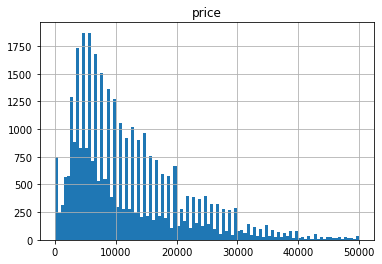

In [30]:
# Analisando os valores de 'price'
df.hist('price', bins=100, range=(0, 50000))


array([[<AxesSubplot:title={'center':'vehicle_age'}>]], dtype=object)

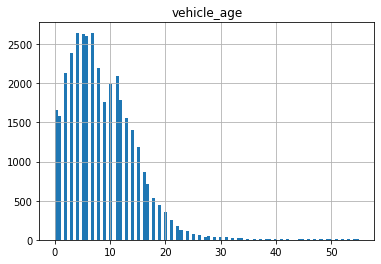

In [31]:
# Analisando os valores de 'vehicle_age'
df.hist('vehicle_age', bins=100, range=(0, 55))



array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

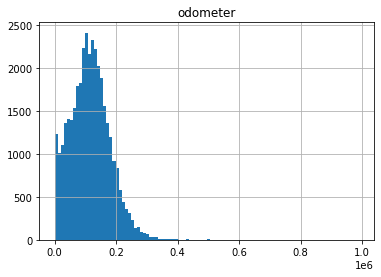

In [32]:
# Analisando os valores de 'odometer'
df.hist('odometer', bins=100)


array([[<AxesSubplot:title={'center':'cylinders'}>]], dtype=object)

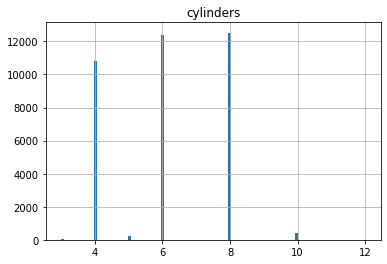

In [33]:
# Analisando os valores de 'cylinders'
df.hist('cylinders', bins=100)


<AxesSubplot:>

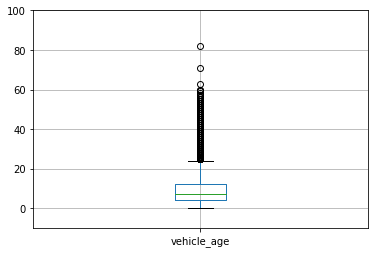

In [34]:
# Analisando os valores de 'vehicle_age'
data = pd.DataFrame({'vehicle_age': df['vehicle_age']})
plt.ylim(-10, 100)
data.boxplot()

<AxesSubplot:>

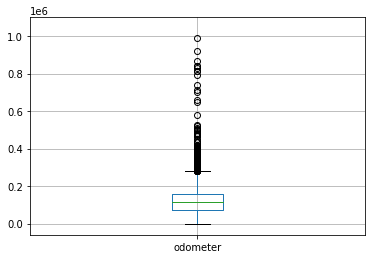

In [35]:
# Analisando os valores de 'odometer'
data_1 = pd.DataFrame({'odometer': df['odometer']})
plt.ylim(-60000, 1100000)
data_1.boxplot()


<AxesSubplot:>

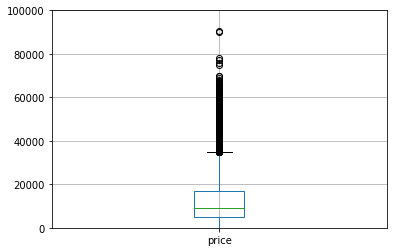

In [36]:
# Analisando os valores de 'price'
data_2 = pd.DataFrame({'price': df['price']})
plt.ylim(-10, 100000)
data_2.boxplot()


## Estude e cuide dos valores ausentes
A partir da análise feita com os gráficos de caixa, será criado um DataFrame sem os valores atípicos.

In [37]:
#Calculando os valores IQR
IQR_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)
IQR_odometer = df['odometer'].quantile(0.75) - df['odometer'].quantile(0.25)
IQR_vehicle_age = df['vehicle_age'].quantile(0.75) - df['vehicle_age'].quantile(0.25)

In [38]:
# Determine o limite inferior para valores atípicos
lim_inf_price = df['price'].quantile(0.25) - 1.5*IQR_price
lim_inf_odometer = df['odometer'].quantile(0.25) - 1.5*IQR_odometer
lim_inf_vehicle_age = df['vehicle_age'].quantile(0.25) - 1.5*IQR_vehicle_age


print(lim_inf_price)
print(lim_inf_odometer)
print(lim_inf_vehicle_age)

-12850.0
-57865.0
-8.0


In [39]:
# Determine o limite superior para valores atípicos
lim_sup_price = df['price'].quantile(0.75) + 1.5*IQR_price
lim_sup_odometer = df['odometer'].quantile(0.75) + 1.5*IQR_odometer
lim_sup_vehicle_age = df['vehicle_age'].quantile(0.75) + 1.5*IQR_vehicle_age


print(lim_sup_price)
print(lim_sup_odometer)
print(lim_sup_vehicle_age)

34750.0
282719.0
24.0


In [40]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
val_ati_price = df.query('@lim_inf_price <= price <= @lim_sup_price')
val_ati_odometer = df.query('@lim_inf_odometer <= odometer <= @lim_sup_odometer')
val_ati_vehicle_age = df.query('@lim_inf_vehicle_age <= vehicle_age <= @lim_sup_vehicle_age')


In [41]:
#Criando o DataFrame com valores sem a influência dos valores atípicos.
dados = pd.DataFrame({'val_price': val_ati_price['price'],
                      'val_odometer': val_ati_odometer['odometer'],
                      'val_vehicle_age': val_ati_vehicle_age['vehicle_age']
                     })

In [42]:
dados

,val_price,val_odometer,val_vehicle_age
0,9400.0,145000.0,7.0
2,5500.0,110000.0,6.0
4,14900.0,80903.0,2.0
5,14990.0,57954.0,4.0
6,12990.0,79212.0,3.0
...,...,...,...
51518,3750.0,110200.0,13.0
51520,9249.0,88136.0,5.0
51521,2700.0,181500.0,16.0
51522,3950.0,128000.0,9.0


## Estude os parâmetros fundamentais sem valores atípicos

Para o próximo estudo serão utilizados os dados filtrados do novo DataFrame para comparação dos dados e fazer novos gráficos.

<AxesSubplot:>

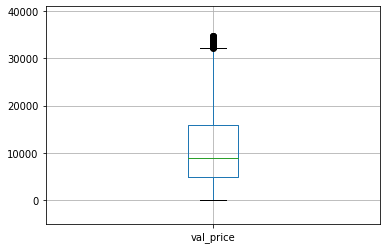

In [43]:
dados_1 = pd.DataFrame({'val_price': val_ati_price['price']})
plt.ylim(-5000, 41000)
dados_1.boxplot()

<AxesSubplot:>

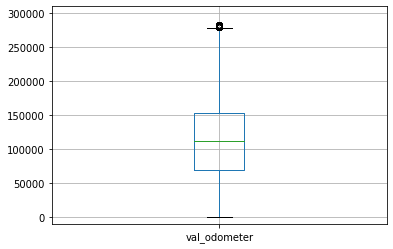

In [44]:
dados_2 = pd.DataFrame({'val_odometer': val_ati_odometer['odometer']})
plt.ylim(-10000, 310000)
dados_2.boxplot()

<AxesSubplot:>

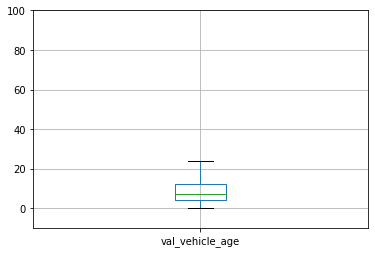

In [45]:
dados_3 = pd.DataFrame({'val_vehicle_age': val_ati_vehicle_age['vehicle_age']})
plt.ylim(-10, 100)
dados_3.boxplot()

## Tempo de vida das propagandas

[Estude quantos dias propagandas foram exibidas (`days_listed`). Calcule a média e a mediana. Descreva o tempo de vida útil comum de uma propaganda. Determine quando as propagandas foram removidas rapidamente, e quando elas foram listadas por um tempo anormalmente longo.]


In [46]:
mean_days_listed = df['days_listed'].mean()
mean_days_listed_format = '{:.2f}'.format(mean_days_listed)
print("A media comum de uma propaganda é:",mean_days_listed_format)

A media comum de uma propaganda é: 39.65


In [47]:
median_days_listed = df['days_listed'].median()
median_days_listed_format = '{:.2f}'.format(median_days_listed)
print("A media comum de uma propaganda é:",median_days_listed_format)

A media comum de uma propaganda é: 33.00


## Média de preços por cada tipo de veículo

Seão analisados o número de propagandas e o preço médio para cada tipo de veículo, com contrução de gráfico mostrando a relação de propaganda ao tipo de veículos.

In [48]:
#Exibindo o DataFrame para realizar análises.
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,sem cor declarada,1.0,2018-06-23,19,5,6,2018,7
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,3,2,2019,6
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,1,4,2019,2
5,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15,2,6,2018,4
6,12990,2015,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73,3,12,2018,3


In [49]:
#Criando uma tabela dinâmica para entender os preço vs modelo
df.pivot_table(index="model", values="price", aggfunc="mean")

,price
model,
acura tl,6395.327381
bmw x5,10864.213198
buick enclave,11682.439394
cadillac escalade,18051.738739
chevrolet camaro,13185.079365
...,...
toyota sienna,9198.919149
toyota tacoma,15428.472509
toyota tundra,14702.582367


In [50]:
# selecionando os dois tipos com os maiores números de propagandas
bigest_type = df.sort_values('date_posted', ascending=False).head(6)
bigest_type

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
12349,17495,2012,cadillac escalade,good,8.0,gas,150194.0,automatic,SUV,black,0.0,2019-04-19,41,4,4,2019,7
4127,3500,2008,ford f-150,good,8.0,gas,130000.0,automatic,pickup,yellow,1.0,2019-04-19,18,4,4,2019,11
30537,24200,2013,ford f-150,excellent,6.0,gas,65279.0,automatic,truck,sem cor declarada,1.0,2019-04-19,30,4,4,2019,6
2888,3995,2002,gmc yukon,excellent,8.0,gas,223350.0,automatic,SUV,grey,1.0,2019-04-19,74,4,4,2019,17
15213,11997,2013,chevrolet camaro,excellent,6.0,gas,90943.0,manual,coupe,black,0.0,2019-04-19,7,4,4,2019,6
4443,4999,2012,subaru outback,excellent,4.0,gas,160.0,automatic,wagon,grey,1.0,2019-04-19,33,4,4,2019,7


In [51]:
# Visualizando os maiores valores
bigest_price = df.sort_values('price', ascending=False).head(10)
bigest_price

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
12504,375000,1999,nissan frontier,good,6.0,gas,115000.0,automatic,pickup,blue,1.0,2018-05-19,21,5,5,2018,19
1309,189000,2014,ford f-150,good,6.0,gas,151248.0,automatic,truck,black,0.0,2019-03-02,56,5,3,2019,5
33434,189000,2014,ford f-150,good,6.0,gas,151248.0,automatic,truck,black,0.0,2019-02-05,102,1,2,2019,5
27375,189000,2014,ford f-150,good,6.0,gas,151248.0,automatic,truck,black,0.0,2018-09-25,72,1,9,2018,4
1668,189000,2014,ford f-150,good,6.0,gas,151248.0,automatic,truck,sem cor declarada,0.0,2019-03-20,21,2,3,2019,5
34389,189000,2014,ford f-150,good,6.0,gas,151248.0,automatic,truck,black,0.0,2019-02-02,28,5,2,2019,5
34206,175000,2004,gmc sierra 2500hd,good,8.0,diesel,149000.0,automatic,truck,grey,1.0,2018-08-25,57,5,8,2018,14
24999,140000,2004,ram 2500,good,6.0,diesel,249000.0,automatic,truck,red,1.0,2019-01-22,8,1,1,2019,15
29810,123456,2000,chevrolet suburban,good,8.0,gas,123456.0,manual,truck,silver,0.0,2018-05-09,40,2,5,2018,18
45263,120000,2006,chevrolet silverado 1500,good,8.0,gas,136000.0,automatic,truck,blue,1.0,2018-05-22,27,1,5,2018,12


In [52]:
#CVisualizando os menores valores 
bigest_price = df.sort_values('price', ascending=False).tail(10)
bigest_price

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,month_posted,year_posted,vehicle_age
19445,1,2003,chevrolet malibu,good,6.0,gas,190000.0,automatic,sedan,sem cor declarada,0.0,2018-11-20,51,1,11,2018,15
29025,1,2017,ford f-150,excellent,10.0,gas,27363.0,other,truck,black,1.0,2018-07-17,12,1,7,2018,1
29024,1,2016,ford f-250 sd,excellent,10.0,gas,65685.0,other,truck,black,1.0,2018-05-30,35,2,5,2018,2
14630,1,2019,ram 3500,excellent,10.0,gas,8530.0,other,truck,white,1.0,2019-01-22,95,1,1,2019,0
14631,1,2014,ram 2500,excellent,6.0,gas,36830.0,automatic,truck,sem cor declarada,1.0,2019-03-11,32,0,3,2019,5
14632,1,2018,ford f-150,excellent,8.0,gas,31975.0,automatic,truck,green,1.0,2018-08-22,16,2,8,2018,0
14634,1,2015,gmc sierra 1500,excellent,10.0,gas,92945.0,other,truck,custom,1.0,2018-10-20,14,5,10,2018,3
17122,1,2014,chevrolet silverado,like new,8.0,gas,42.0,automatic,truck,black,1.0,2018-10-27,16,5,10,2018,4
14636,1,2016,toyota tundra,excellent,10.0,gas,47139.0,other,truck,brown,1.0,2019-01-19,84,5,1,2019,3
13073,1,2014,chevrolet camaro,excellent,8.0,gas,51550.0,manual,coupe,black,1.0,2019-03-21,24,3,3,2019,5


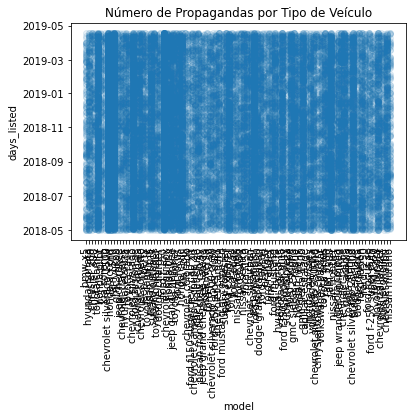

In [53]:
# criando o gráfico de dispersão
plt.scatter(df['model'], df['date_posted'], alpha=0.1)
plt.xticks(rotation=90)
plt.xlabel('model')
plt.ylabel('days_listed')
plt.title('Número de Propagandas por Tipo de Veículo')
plt.show()

In [54]:
#Analisando a quantidade de duplicatas.
duplicated = df['model'].value_counts()
duplicated

ford f-150                  1982
chevrolet silverado 1500    1523
ram 1500                    1235
chevrolet silverado          884
jeep wrangler                798
                            ... 
acura tl                     168
chrysler 200                 162
kia sorento                  162
nissan murano                161
ford f-250 super duty        160
Name: model, Length: 99, dtype: int64

## Fatores de preço

Serão analisados os fatores que mais impactam o preço, será feito correlações entra a coluna de preço com as demais, com a contrução de gráficos, serão utilizados colunas com categorias variávei.

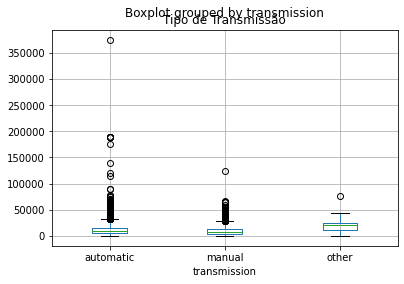

In [55]:
df.boxplot(column="price", by="transmission")
plt.title("Tipo de Transmissão")
plt.show()

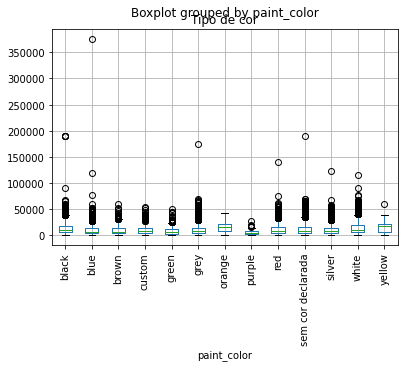

In [56]:
df.boxplot(column="price", by="paint_color")
plt.title("Tipo de cor")
plt.xticks(rotation=90)
plt.show()

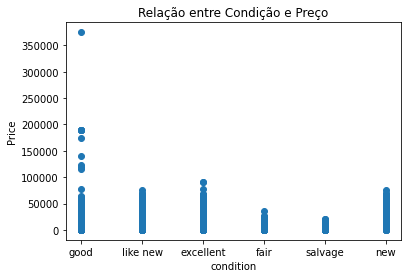

In [57]:
plt.scatter(df["condition"], df["price"])
plt.xlabel("condition")
plt.ylabel("Price")
plt.title("Relação entre Condição e Preço")
plt.show()

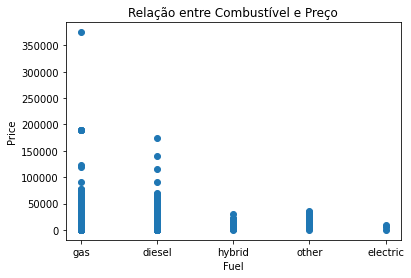

In [58]:
plt.scatter(df["fuel"], df["price"])
plt.xlabel("Fuel")
plt.ylabel("Price")
plt.title("Relação entre Combustível e Preço")
plt.show()


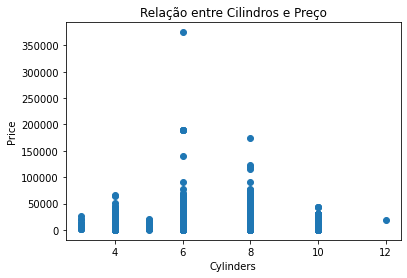

In [59]:
plt.scatter(df["cylinders"], df["price"])
plt.xlabel("Cylinders")
plt.ylabel("Price")
plt.title("Relação entre Cilindros e Preço")
plt.show()

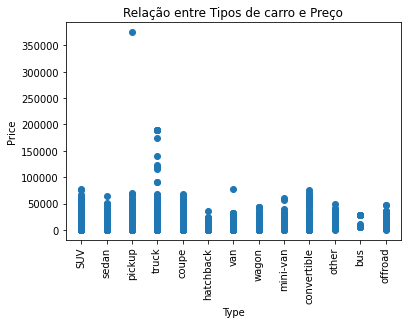

In [60]:
plt.scatter(df["type"], df["price"])
plt.xlabel("Type")
plt.ylabel("Price")
plt.title("Relação entre Tipos de carro e Preço")
plt.xticks(rotation=90)
plt.show()



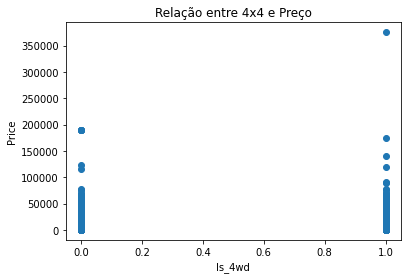

In [61]:
plt.scatter(df["is_4wd"], df["price"])
plt.xlabel("Is_4wd")
plt.ylabel("Price")
plt.title("Relação entre 4x4 e Preço")
plt.show()


## Conclusão geral

Os dados apresentaram muitos modelos de carros duplicados o que é totalmente plausível, os dados ausentes não foram substituídos por entender que refletiriam em um erro das informações prestadas, pois cada carro possui sua particularidade.Os carros que possuem câmbio automático, da cor laranja, que estejam classificados na condição "like new", tenham motor movido à gasolina, tenham 6 ou 8 cilindros e sejam conversível estão entre os carros com os preços mais elevados.